<h1 align="center">Titanic Survivor Analysis</h1>

<font size="4" color="blue" face="verdana"> Titanic Data Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This study analyzed What factors made people more likely to survive, including Gender, Class, and Age etc..Data Wrangling has been performed fisrt to clean up the data. Various kinds of table and chart have been used for data visulation. A conclusion is drawed from the analysis finally</font>

In [45]:
#Import Libiraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

In [46]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.info()
titanic_data['SibSpOrNot'] = (titanic_data['SibSp'] != 0)
titanic_data['ParchOrNot'] = (titanic_data['Parch'] != 0)
titanic_data.head(5)
print "NaN Ages:",sum(pd.isnull(titanic_data['Age']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
NaN Ages: 177


<font size="4" color="blue" face="verdana">Initial review of the data shows that the csv file contains the following attributes: PassengerId, Survived or Not, Class, Sex, Age, SibSp, Parch, Ticket number, Fare, and Embarked locations. SibSpOrNot, ParchOrNot and AgeGroup are added the group for futher analysis. 

Data Wrangling: Some age data is missing, which is shown as NaN. There are 177 NaN ages in the files. These values will be ignored in Age-Suvival correlation analysis.

In [47]:
# Calculate the percentage of survivors group by different factors
def calculate_percentage(groupby_factor, groupby_detail):
    group = titanic_data.groupby(groupby_factor).count()['PassengerId']
    group_survived = titanic_data.groupby(groupby_factor).sum()['Survived']
    
    percentage = float(group_survived[groupby_detail])/(group[groupby_detail])
    return [percentage, group_survived[groupby_detail], group[groupby_detail]]

In [48]:
#plot the results by
def plot_survived(percentage, x_labels, title):
    plt.figure(figsize=(4, 2))
    fig = pd.Series.from_array(percentage).plot(kind='bar')
    fig.set_title(title)
    fig.set_xticklabels(x_labels,rotation=0)
    return None

In [49]:
total_passenger = titanic_data.shape[0]
total_survived = titanic_data['Survived'].sum()
percent_survived = float(total_survived)/total_passenger
print 'percentage of survived', '{:.2%}'.format(percent_survived),'(',total_survived,'/',total_passenger,')'

percentage of survived 38.38% ( 342 / 891 )


<font size="4" color="blue" face="verdana">The percentage of survived in the population is 38.38, which is the baseline of the following analysis.

percentage of female survived 74.20% ( 233 / 314 )
percentage of male survived 18.89% ( 109 / 577 )


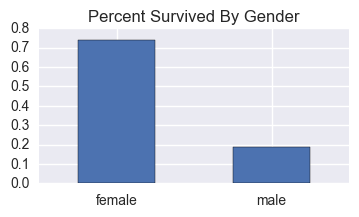

In [50]:
percent_survived_female = calculate_percentage('Sex','female')
percent_survived_male = calculate_percentage('Sex','male')

print 'percentage of female survived', '{:.2%}'.format(percent_survived_female[0]),'(',percent_survived_female[1],'/',percent_survived_female[2],')'
print 'percentage of male survived', '{:.2%}'.format(percent_survived_male[0]),'(',percent_survived_male[1],'/',percent_survived_male[2],')'

plot_survived([percent_survived_female[0],percent_survived_male[0]], \
              ['female','male'], \
              'Percent Survived By Gender')

<font size="4" color="blue" face="verdana"> 74.20% of female survived, while only 18.89% of male survived. Female's survival rate is higher than male by 55.31%, possibly because women were allowed to the lifeboats before men as a tradition.

percentage of Class 1 survived 62.96%
percentage of Class 2 survived 47.28%
percentage of Class 3 survived 24.24%


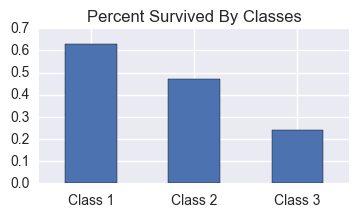

In [51]:
percent_survived_Class_1 = calculate_percentage('Pclass',1)
percent_survived_Class_2 = calculate_percentage('Pclass',2)
percent_survived_Class_3 = calculate_percentage('Pclass',3)

print 'percentage of Class 1 survived', '{:.2%}'.format(percent_survived_Class_1[0])
print 'percentage of Class 2 survived', '{:.2%}'.format(percent_survived_Class_2[0])
print 'percentage of Class 3 survived', '{:.2%}'.format(percent_survived_Class_3[0])

plot_survived([percent_survived_Class_1[0],\
               percent_survived_Class_2[0],\
               percent_survived_Class_3[0]],\
              ['Class 1','Class 2','Class 3'],\
              'Percent Survived By Classes')




Counts of Class 1 survived 136
Counts of Class 2 survived 87
Counts of Class 3 survived 119


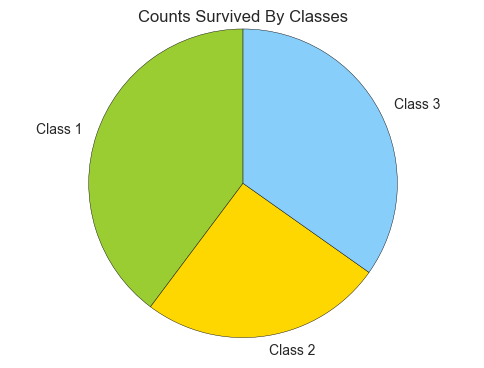

In [52]:
print 'Counts of Class 1 survived', percent_survived_Class_1[1]
print 'Counts of Class 2 survived', percent_survived_Class_2[1]
print 'Counts of Class 3 survived',percent_survived_Class_3[1]

plt.pie( [percent_survived_Class_1[1],\
         percent_survived_Class_2[1],\
         percent_survived_Class_3[1]], labels = labels, colors=colors, startangle=90)
plt.axis('equal')
plt.title('Counts Survived By Classes')

<font size="4" color="blue" face="verdana"> 62.96% of Class 1 passengers survived; 47.28% of Class 2 passengers survived; 24.24% of Class 3 passengers survived. It indicates a trend that the higher the Class, the higher the survival rate. One possible reason is that the higher the class, the higher the cabinets are on the ship and hence the easier access to the lifeboats. It could also because the ship screws gave privilege to higher class passengers to access the lifeboats.

Chart 'Counts Survived By Classes' indicates that the percentage of Class 3 survived is much less than class 1, however the total counts are very close. This is probably due to the larger population of Class 3.


In [53]:
### Percentage of femle from Class 1 survived

#percent_survived_female = calculate_percentage(['Sex','Pclass'],['female',1])
group = titanic_data.groupby(['Sex','Pclass']).count()['PassengerId']
group_survived = titanic_data.groupby(['Sex','Pclass']).sum()['Survived']
percent_survived_female = (group_survived['female',1])/float(group['female',1])
print 'percentage of femle from Class 1 survived', '{:.2%}'.format(percent_survived_female)

percentage of femle from Class 1 survived 96.81%


<font size="4" color="blue" face="verdana"> It can be guessed that female in the First Class will have a higher survival rate. To test this hypothesis, data is group by both gender and class. It shows that 96.81% of female from Class 1 survived, which validated the hypothesis.

In [54]:
percent_survived_Embarked_S = calculate_percentage('Embarked','S')
percent_survived_Embarked_C = calculate_percentage('Embarked','C')
percent_survived_Embarked_Q = calculate_percentage('Embarked','Q')

print 'percentage of Embarked @ S survived', '{:.2%}'.format(percent_survived_Embarked_S[0]),'(',percent_survived_Embarked_S[1],'/',percent_survived_Embarked_S[2],')'
print 'percentage of Embarked @ C survived', '{:.2%}'.format(percent_survived_Embarked_C[0]),'(',percent_survived_Embarked_C[1],'/',percent_survived_Embarked_C[2],')'
print 'percentage of Embarked @ Q survived', '{:.2%}'.format(percent_survived_Embarked_Q[0]),'(',percent_survived_Embarked_Q[1],'/',percent_survived_Embarked_Q[2],')'

print '\n',titanic_data.groupby('Embarked').mean()['Pclass']


percentage of Embarked @ S survived 33.70% ( 217 / 644 )
percentage of Embarked @ C survived 55.36% ( 93 / 168 )
percentage of Embarked @ Q survived 38.96% ( 30 / 77 )

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64


<font size="4" color="blue" face="verdana"> To investigate if the embarking location also plays a roll, data is grouped by embarking location. While intuitively there shouldn't be any relationship between embarking location and the survival rate since all people sunk at the same time, the data shows location "C" has a higer survival rate. This is suspicious. Further analysis shows that the people from location "C" also are in general in a higher Class than the other two locations. (1.88 vs 2.91 vs 2.35). This confirmed that the embarking location is not the deciding factor, but Class is. 

percentage of SibSpYes survived 46.64% ( 132 / 283 )
percentage of SibSpNo survived 34.54% ( 210 / 608 )


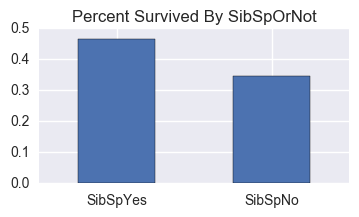

In [55]:
percent_survived_SibSpYes = calculate_percentage('SibSpOrNot',True)
percent_survived_SibSpNo = calculate_percentage('SibSpOrNot',False)

print 'percentage of SibSpYes survived', '{:.2%}'.format(percent_survived_SibSpYes[0]),'(',percent_survived_SibSpYes[1],'/',percent_survived_SibSpYes[2],')'
print 'percentage of SibSpNo survived', '{:.2%}'.format(percent_survived_SibSpNo[0]),'(',percent_survived_SibSpNo[1],'/',percent_survived_SibSpNo[2],')'

plot_survived([percent_survived_SibSpYes[0],percent_survived_SibSpNo[0]], \
              ['SibSpYes','SibSpNo'], \
              'Percent Survived By SibSpOrNot')

percentage of ParchYes survived 51.17% ( 109 / 213 )
percentage of ParchNo survived 34.37% ( 233 / 678 )


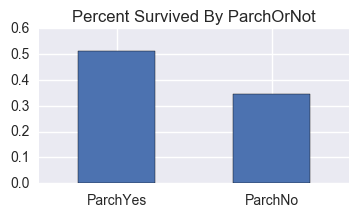

In [56]:
percent_survived_ParchYes = calculate_percentage('ParchOrNot',True)
percent_survived_ParchNo = calculate_percentage('ParchOrNot',False)

print 'percentage of ParchYes survived', '{:.2%}'.format(percent_survived_ParchYes[0]),'(',percent_survived_ParchYes[1],'/',percent_survived_ParchYes[2],')'
print 'percentage of ParchNo survived', '{:.2%}'.format(percent_survived_ParchNo[0]),'(',percent_survived_ParchNo[1],'/',percent_survived_ParchNo[2],')'

plot_survived([percent_survived_ParchYes[0],percent_survived_ParchNo[0]], \
              ['ParchYes','ParchNo'], \
              'Percent Survived By ParchOrNot')

<font size="4" color="blue" face="verdana"> The above two analysis show that having family members on board will also increase survival rate, although the reason is not well understood.

percentage of survived, Age Child 50.36% , total number of people: 139
percentage of survived, Age Adult 38.52% , total number of people: 501
percentage of survived, Age Senior 36.49% , total number of people: 74


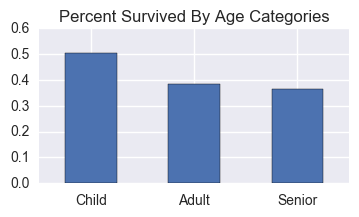

In [57]:
titanic_data['Age_categories'] = pd.cut(titanic_data['Age'], bins=[0,18,49,90], labels=["Child","Adult","Senior"])

titanic_data['Age_categories'].head(20)

percent_survived_Child = calculate_percentage('Age_categories',0)
percent_survived_Adult = calculate_percentage('Age_categories',1)
percent_survived_Senior = calculate_percentage('Age_categories',2)

total_people_byAge_categories = titanic_data.groupby('Age_categories').count()['PassengerId']
print 'percentage of survived, Age Child', '{:.2%}'.format(percent_survived_Child[0]), ', total number of people:', total_people_byAge_categories[0]
print 'percentage of survived, Age Adult', '{:.2%}'.format(percent_survived_Adult[0]),', total number of people:', total_people_byAge_categories[1]
print 'percentage of survived, Age Senior', '{:.2%}'.format(percent_survived_Senior[0]),', total number of people:', total_people_byAge_categories[2]

plot_survived([percent_survived_Child[0],\
               percent_survived_Adult[0],\
               percent_survived_Senior[0]],\
              ['Child','Adult','Senior'], \
              'Percent Survived By Age Categories')

<font size="4" color="blue" face="verdana"> Survivals Data is group by ages to study if there is any relationship between age and survial rate. Abnormal data(NaN) ages are removed beforehand to clean up the data. Initial check shows that Children have a higher survival rate than other age groups, which probably because they received more care of other people on board and got onto rescue boat first.

 <font size="4" color="blue" face="verdana">Limitations of the analysis
 
 1. Some of the age informaion is missing. This study chose to omit these values. This could lead to lack of comprehensiveness
 
 2. This analysis is made without statistical testing (t-test, z-test, etc.). This made us less confident that the study would reflect the entire polulation
 
 3. There could be other variable such as the health condition, place of birth and ocupation that may affect chance of survival. 
 
 4. This investigation is only for Correlation, but not for Causation, since tests under controlled environment are made. The analysis is only based on existing data.

<font size="4" color="blue" face="verdana"> In conclusion, with the limitation dicussed above, female, 1st Class and Senior people have a higher survial rate than other groups. If you can't choose your gender and age, buying a higher class ticket would be probably be a good choice.